# Prediction of Stock Price with COVID-19 Impact factor using ANN

- <b>Using Artificial Neural Network (ANN) for  predicting the Stock Price involving COVID-19 Impact factor for 10th August.</b> <br>,
- <b>Preprocessing of \"Train_Dataset\" and \"Test_Dataset\", as there are significant amount of null values and some features have values of String datatype, so we have dropped some attributes which were not neede in the predicton, filled the missing data with the most frequent data and used \"LabelEncoder\" to convert categorical data to numerical data.</b><br>,
- <b>For training the \"Train_Dataset\". I created an ANN or Artificial Neural Network and compared its performance with linear SVR and RBF-SVR (SVR - Support Vector Regression). The performance for ANN was the best among the three models tried and was chosen for training the data.</b><br>,
- <b> The ANN was chosen because it had decent trainign speed, and had lowest MAE (mean absolute error) and RMSE (root mean squared error).</b><br>,
- <b> Output is Stock Price with Stock Index is in the form of excel workbook \"part-01.xlsx\".</b>

# Predicting Stock Price in Training Dataset

### Best Machine Learning/Deep Learning model to predict stock price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Train_dataset.xlsx", sheet_name = "Train_Aug10")
df1 = pd.read_excel("Test_dataset.xlsx", sheet_name = "Test_Aug10")
df2 = pd.read_excel("Test_dataset.xlsx", sheet_name = "Test_Aug10")

In [3]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
df1.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


### Dropping unwanted features/attributes

In [5]:
z = df["Stock Index"]

In [6]:
df.drop(["Stock Index"], axis = 1, inplace = True)

In [7]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


### Filling the missing values

In [8]:
df_null = df.columns[df.isnull().any()]
df[df_null].isnull().sum()

VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
dtype: int64

In [9]:
df["VWAP"].fillna(method ='ffill', inplace = True)
df["General Index"].fillna(method ='ffill', inplace = True)
df["NAV"].fillna(method ='ffill', inplace = True)
df["P/E Ratio"].fillna(method ='ffill', inplace = True)
df["Volumes Traded"].fillna(method ='ffill', inplace = True)
df["Inventory Turnover"].fillna(method ='ffill', inplace = True)
df["Covid Impact (Beta)"].fillna(method ='ffill', inplace = True)
df["Tracking Error"].fillna(method ='ffill', inplace = True)
df["Dollar Exchange Rate"].fillna(method ='ffill', inplace = True)
df["Put-Call Ratio"].fillna(method ='ffill', inplace = True)
df["P/B Ratio"].fillna(method ='ffill', inplace = True)

In [10]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.91,560.859622
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.09,1279.732874
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,S&P 500,Real Estate,828.13,3351.28,23.79,151.76,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


### Using LabelEncoder to convert Categorical Values into Numerical

In [11]:
df_ctgcol = list(df.select_dtypes(exclude = ["number"]).columns)
df_ctgcol

['Index', 'Industry']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_ctgcol:
    print(df[i].unique())
    df[i] = le.fit_transform(df[i])
    print(df[i].unique())

['NYSE' 'BSE' 'S&P 500' 'NSE' 'JSE']
[3 0 4 2 1]
['Real Estate' 'Information Tech' 'Materials' 'Healthcare' 'Energy']
[4 2 3 1 0]


In [13]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,3,4,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,3,2,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.91,560.859622
2,3,2,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.09,1279.732874
3,0,3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,4,4,828.13,3351.28,23.79,151.76,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [14]:
df.size, df.shape

(103362, (7383, 14))

### Normalizing data using MinMaxScaler function

In [15]:
X = df.iloc[:,0:13]
y = df.iloc[:,[13]]

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = np.reshape(np.array(y),(-1,1))
y = sc.fit_transform(y)

### Splitting the data into training set and testing set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=22)

In [18]:
from sklearn.svm import SVR

### Training and predicting data using Support Vector Regression (SVR) with linear Kernal

In [19]:
reg_svr1 = SVR(kernel='linear', gamma=1, C = 100)
reg_svr1.fit(X_train,y_train)

c:\users\divam\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=1, kernel='linear')

In [20]:
y_pred1 = reg_svr1.predict(X_test)

### Training and predicting data using Support Vector Regression (SVR) with rbf Kernal

In [21]:
reg_svr2 = SVR(kernel='rbf', gamma=1, C = 100)
reg_svr2.fit(X_train,y_train)

c:\users\divam\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=1)

In [22]:
y_pred2 = reg_svr2.predict(X_test)

### Training and predicting data using 4 - layered Artificial Neural Network (ANN)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
reg_ann = Sequential()
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
reg_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [25]:
reg_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [26]:
reg_ann.fit(X_train, y_train, batch_size = 13, epochs = 65)

Epoch 1/65
455/455 [==============================] - 0s 960us/step - loss: 0.0576 - accuracy: 1.6932e-04
Epoch 2/65
455/455 [==============================] - 0s 1000us/step - loss: 0.0380 - accuracy: 1.6932e-04
Epoch 3/65
455/455 [==============================] - 1s 1ms/step - loss: 0.0121 - accuracy: 1.6932e-04
Epoch 4/65
455/455 [==============================] - 0s 951us/step - loss: 0.0060 - accuracy: 1.6932e-04
Epoch 5/65
455/455 [==============================] - 0s 980us/step - loss: 0.0051 - accuracy: 1.6932e-04
Epoch 6/65
455/455 [==============================] - 0s 973us/step - loss: 0.0048 - accuracy: 1.6932e-04
Epoch 7/65
455/455 [==============================] - 0s 989us/step - loss: 0.0046 - accuracy: 1.6932e-04
Epoch 8/65
455/455 [==============================] - 0s 978us/step - loss: 0.0044 - accuracy: 1.6932e-04
Epoch 9/65
455/455 [==============================] - 0s 973us/step - loss: 0.0043 - accuracy: 1.6932e-04
Epoch 10/65
455/455 [==========================

In [27]:
y_pred3 = reg_ann.predict(X_test)

### Plots

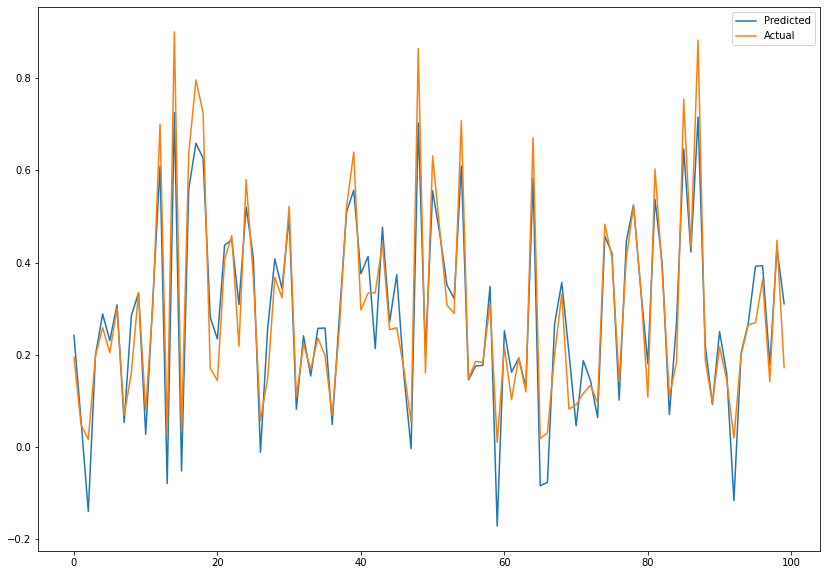

In [28]:
fig = plt.figure(figsize=(14,10))
plt.plot(y_pred1[:100], label = 'Predicted')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

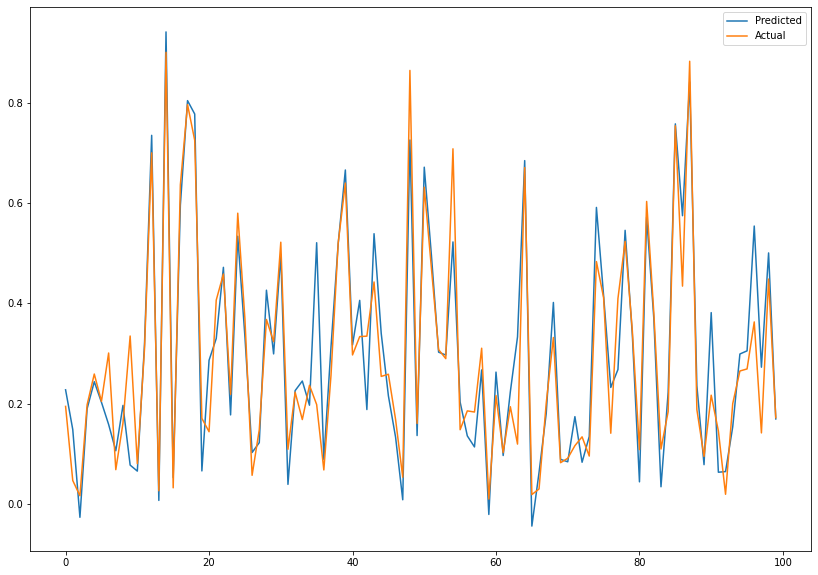

In [29]:
fig = plt.figure(figsize=(14,10))
plt.plot(y_pred2[:100], label = 'Predicted')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

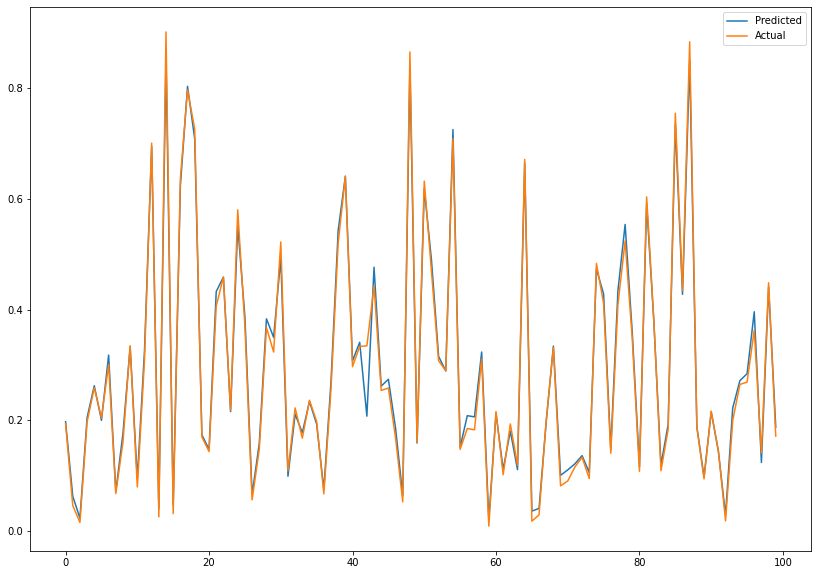

In [30]:
fig = plt.figure(figsize=(14,10))
plt.plot(y_pred3[:100], label = 'Predicted')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

### Comparing performances of the models trained

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(y_test, y_pred1)

0.059130836271092266

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred1))

0.08538380653520825

In [34]:
mean_absolute_error(y_test, y_pred2)

0.06315770319191907

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred2))

0.09271939343844929

In [36]:
mean_absolute_error(y_test, y_pred3)

0.02122319379167746

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred3))

0.05687169907013186

# Predicting Stock Price in Test Dataset

In [38]:
df = pd.read_excel("Train_dataset.xlsx")
df1 = pd.read_excel("Test_dataset.xlsx")
df2 = pd.read_excel("Test_dataset.xlsx")

In [39]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [40]:
df.shape

(7383, 15)

## Train Dataset - Preprocessing

### Dropping of unwanted features/attributes

In [41]:
z = df["Stock Index"]

In [42]:
df.drop(["Stock Index"], axis = 1, inplace = True)

In [43]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


### Filling the missing values

In [44]:
df_null = df.columns[df.isnull().any()]
df[df_null].isnull().sum()

VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
dtype: int64

In [45]:
df["VWAP"].fillna(method ='ffill', inplace = True)
df["General Index"].fillna(method ='ffill', inplace = True)
df["NAV"].fillna(method ='ffill', inplace = True)
df["P/E Ratio"].fillna(method ='ffill', inplace = True)
df["Volumes Traded"].fillna(method ='ffill', inplace = True)
df["Inventory Turnover"].fillna(method ='ffill', inplace = True)
df["Covid Impact (Beta)"].fillna(method ='ffill', inplace = True)
df["Tracking Error"].fillna(method ='ffill', inplace = True)
df["Dollar Exchange Rate"].fillna(method ='ffill', inplace = True)
df["Put-Call Ratio"].fillna(method ='ffill', inplace = True)
df["P/B Ratio"].fillna(method ='ffill', inplace = True)

In [46]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.91,560.859622
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.09,1279.732874
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,S&P 500,Real Estate,828.13,3351.28,23.79,151.76,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


### Using LabelEncoder to convert Categorical Values into Numerical

In [47]:
df_ctgcol = list(df.select_dtypes(exclude = ["number"]).columns)
df_ctgcol

['Index', 'Industry']

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_ctgcol:
    print(df[i].unique())
    df[i] = le.fit_transform(df[i])
    print(df[i].unique())

['NYSE' 'BSE' 'S&P 500' 'NSE' 'JSE']
[3 0 4 2 1]
['Real Estate' 'Information Tech' 'Materials' 'Healthcare' 'Energy']
[4 2 3 1 0]


In [49]:
df.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,3,4,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,3,2,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.91,560.859622
2,3,2,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.09,1279.732874
3,0,3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,4,4,828.13,3351.28,23.79,151.76,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


## Test Dataset - Preprocessing

In [50]:
df1.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [51]:
df1.shape

(3331, 14)

### Dropping of unwanted features/attributes

In [52]:
a = df1['Stock Index']

In [53]:
df1.drop(["Stock Index"], axis = 1, inplace = True)

In [54]:
df1.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


### Filling the missing values

In [55]:
df1_null = df1.columns[df1.isnull().any()]
df1[df1_null].isnull().sum()

VWAP                     12
General Index           271
NAV                     275
P/E Ratio               292
Volumes Traded           48
Inventory Turnover       30
Covid Impact (Beta)      31
Tracking Error          126
Dollar Exchange Rate    143
Put-Call Ratio          429
P/B Ratio               138
dtype: int64

In [56]:
df1["VWAP"].fillna(method ='ffill', inplace = True)
df1["General Index"].fillna(method ='ffill', inplace = True)
df1["NAV"].fillna(method ='ffill', inplace = True)
df1["P/E Ratio"].fillna(method ='ffill', inplace = True)
df1["Volumes Traded"].fillna(method ='ffill', inplace = True)
df1["Inventory Turnover"].fillna(method ='ffill', inplace = True)
df1["Covid Impact (Beta)"].fillna(method ='ffill', inplace = True)
df1["Tracking Error"].fillna(method ='ffill', inplace = True)
df1["Dollar Exchange Rate"].fillna(method ='ffill', inplace = True)
df1["Put-Call Ratio"].fillna(method ='ffill', inplace = True)
df1["P/B Ratio"].fillna(method ='ffill', inplace = True)

In [57]:
df1.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,1.09,6.18


### Using LabelEncoder to convert Categorical Values into Numerical

In [58]:
df1_ctgcol = list(df1.select_dtypes(exclude = ["number"]).columns)
df1_ctgcol

['Index', 'Industry']

In [59]:
le = LabelEncoder()
for i in df1_ctgcol:
    print(df1[i].unique())
    df1[i] = le.fit_transform(df1[i])
    print(df1[i].unique())

['NSE' 'JSE' 'S&P 500' 'NYSE' 'BSE']
[2 1 4 3 0]
['Materials' 'Energy' 'Information Tech' 'Healthcare' 'Real Estate']
[3 0 2 1 4]


In [60]:
df1.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,2,3,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,1,0,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,4,2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,2,1,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,3,3,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,1.09,6.18


In [61]:
df.shape, df1.shape

((7383, 14), (3331, 13))

### Normalizing the data using MinMaxScaler function

In [62]:
X = df.iloc[:,0:13]
y = df.iloc[:,[13]]

In [63]:
sc = MinMaxScaler()
sc2 = MinMaxScaler()
X_train = sc.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = sc2.fit_transform(y)

In [64]:
X_train.shape, y_train.shape

((7383, 13), (7383, 1))

In [65]:
U = df1.iloc[:,0:13]

In [66]:
sc = MinMaxScaler()
X_test = sc.fit_transform(U)

In [67]:
X_test.shape

(3331, 13)

### Training of Train Data & Prediction of Test data using the best model discoverd previously

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
reg_ann = Sequential()
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
reg_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
reg_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [70]:
reg_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [71]:
reg_ann.fit(X_train, y_train, batch_size = 13, epochs = 65)

Epoch 1/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0483 - accuracy: 1.3545e-04
Epoch 2/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0136 - accuracy: 2.7089e-04
Epoch 3/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0084 - accuracy: 2.7089e-04
Epoch 4/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 2.7089e-04
Epoch 5/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0059 - accuracy: 2.7089e-04
Epoch 6/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 2.7089e-04
Epoch 7/65
568/568 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 2.7089e-04
Epoch 8/65
568/568 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 2.7089e-04
Epoch 9/65
568/568 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 2.7670e- - 1s 1ms/step - loss: 0.0045 - accuracy: 2.7089e-04
Epoch 10/65
568/56

In [72]:
y_pred = reg_ann.predict(X_test)

In [73]:
y_val = y_pred.reshape(-1,1)
y_val = sc2.inverse_transform(y_val)

In [74]:
y = pd.DataFrame(y_val)
y

,0
0,856.887878
1,313.365326
2,1475.933472
3,809.846619
4,286.246063
...,...
3326,177.758698
3327,189.188156
3328,180.861176
3329,487.013092


### Exporting values into an Excel workbook

In [75]:
test_index = df2.iloc[:,0].values

In [76]:
import xlsxwriter

In [77]:
workbook = xlsxwriter.Workbook('part-01.xlsx') 
worksheet = workbook.add_worksheet()

In [78]:
row = 1
row_id=0
column_id = 0
column=1
worksheet.write(0,0,'Stock Index')
worksheet.write(0,1,'Stock Price (Predicted)')

0

In [79]:
for i in range(len(y_val)) : 
    worksheet.write(row, column_id, test_index[i])
    worksheet.write(row, column, y_val[i])
    row += 1

In [80]:
workbook.close()